In [1]:
%load_ext autoreload
import numpy as np

In [63]:
import pickle

In [56]:
%autoreload
from supernet.model import SuperNet
from supernet.train import train_supernet_mnist

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
training_settings = {'seed':1,
                     'batch_size':64,
                     'test_batch_size':1000,
                     'epochs':14,
                     'learning_rate':1.0,
                     'gamma':0.7,
                     'no_cuda':True,
                     'log_interval':50,
                     'save_model':True
                    }

In [49]:
%autoreload
from supernet.model import SuperNetSum, SuperNetConcat

### SuperNetSum. One-shot accuracy

In [54]:
training_settings['epochs'] = 14
top1_oneshot_SuperNetSum = train_supernet_mnist(SuperNetSum(conv1channels=8, conv2channels=8, hidden=32), 
                                                training_settings)

top1_oneshot_SuperNetSum = np.array(top1_oneshot_SuperNetSum)


Training subnet None

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309106
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.788342
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.481753
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.276971
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.162657
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.398848
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.373438
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.172315
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.070989
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.084241
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.153414
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.248114
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.129198
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.122752
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.184599
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.126617
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.156265
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.054449
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.209080
Test set: Average loss: 0.0941, Accu

Test set: Average loss: 0.0342, Accuracy: 9883/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.009857
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.013759
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.100477
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.067149
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.020139
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.036661
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.032961
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.012255
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011449
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.003048
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.031245
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.184003
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.092658
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.020989
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.052758
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.017136
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.188814
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.015154
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.047318


Test set: Average loss: 0.0342, Accuracy: 9881/10000 (99%)
Test set: Average loss: 0.0347, Accuracy: 9885/10000 (99%)
Test set: Average loss: 0.0320, Accuracy: 9892/10000 (99%)


<IPython.core.display.Javascript object>


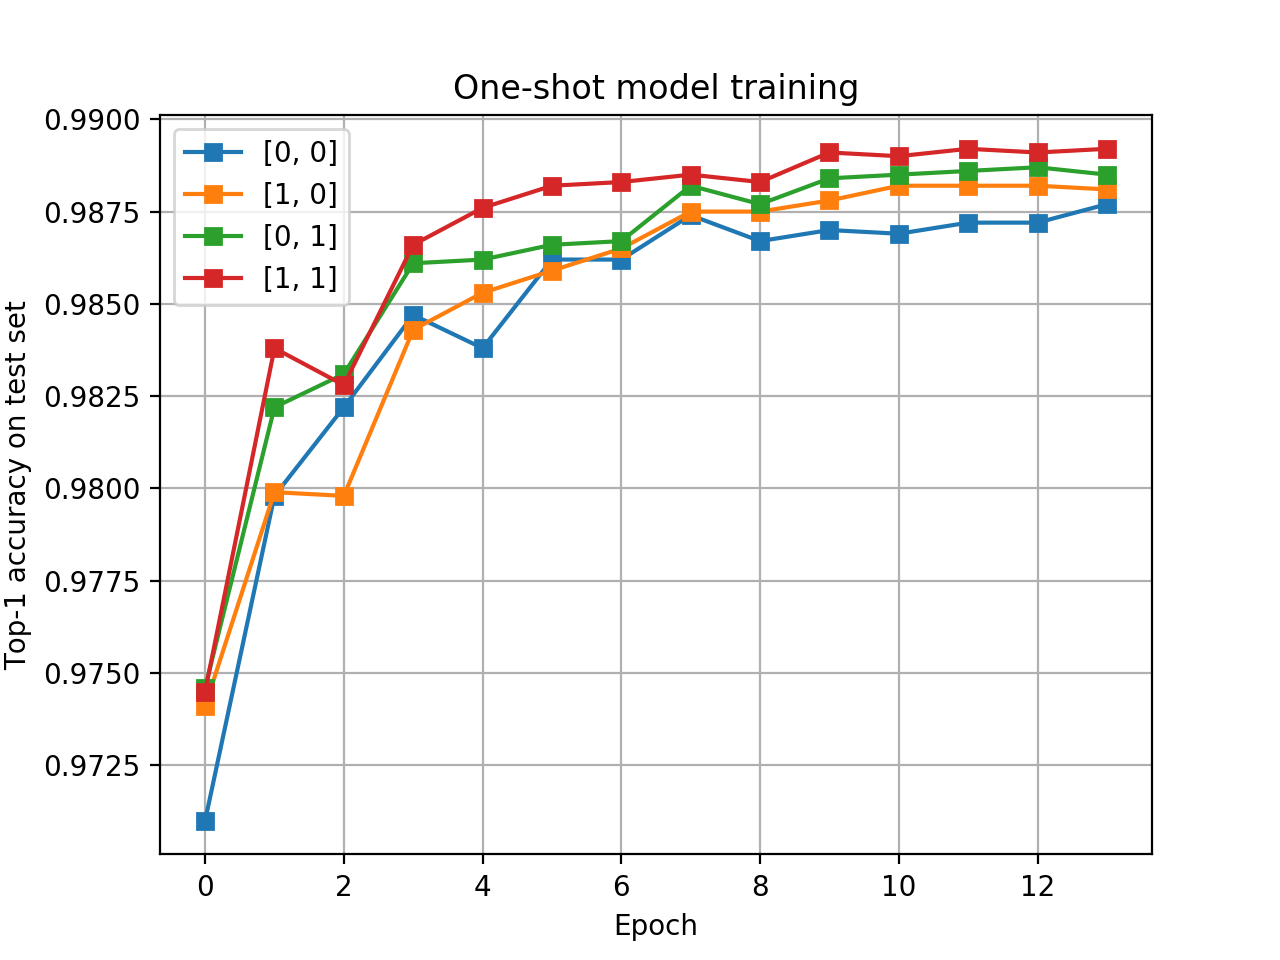

In [55]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetSum, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_oneshot_SuperNetSum.png')

### SuperNetSum. Stand-alone subnet accuracy

In [50]:
top1_SuperNetSum = []
training_settings['epochs'] = 14
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_SuperNetSum.append(train_supernet_mnist(SuperNetSum(conv1channels=8, conv2channels=8, hidden=32), 
                                                 training_settings, subnet=subnet))

top1_SuperNetSum = np.array(top1_SuperNetSum)


Training SuperNet

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.339143
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.632288
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.228134
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.127687
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.142698
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.339714
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.275317
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.147296
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.082277
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.120077
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.176954
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.160102
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.105133
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.101901
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.172858
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.158628
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.230931
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.029409
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.165305
Test set: Average loss: 0.0828, Accurac

Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.024716
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.014735
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.032602
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.018458
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.005784
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.004912
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.069194
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.091202
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.028148
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.014288
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.063759
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.035401
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.207998
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.026072
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.048443
Test set: Average loss: 0.0488, Accuracy: 9843/10000 (98%)
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.027573
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.014622
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.020050
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.069

Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.060972
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.011406
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.023647
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.027971
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.076476
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.140318
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.104139
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.035079
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.048541
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.027289
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.205371
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.015510
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.040308
Test set: Average loss: 0.0495, Accuracy: 9833/10000 (98%)
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.009771
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.026523
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.157230
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.067053
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.038197
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.041300


Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.040769
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.134868
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.057573
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.009177
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.024709
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.007770
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.139040
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.014565
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.017704
Test set: Average loss: 0.0342, Accuracy: 9887/10000 (99%)
Train Epoch: 12 [0/60000 (0%)]	Loss: 0.011589
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.013546
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.130275
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.064130
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.014406
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.014415
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.007773
Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.001707
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.015367
Train Epoch: 12 [28800/60000 (48

Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.021806
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.019693
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.006830
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.111350
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.024897
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.015457
Test set: Average loss: 0.0403, Accuracy: 9873/10000 (99%)
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.007422
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.004651
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.014715
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.056044
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.006256
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.008869
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.008120
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.004436
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.006351
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.006885
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.052253
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.192936
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.019560


Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.098562
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.010103
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.005828
Test set: Average loss: 0.0365, Accuracy: 9888/10000 (99%)
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.002236
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.001369
Train Epoch: 14 [6400/60000 (11%)]	Loss: 0.014864
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.039431
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.002839
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.005996
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.004602
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.002509
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.005046
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.002230
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.014063
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.184382
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.014199
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.009401
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.009312
Train Epoch: 14 [48000/60000 (80

Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001014
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.021314
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.132894
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.013167
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.006178
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.008418
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.006247
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011708
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.006172
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.009285
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.079567
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.049597
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.009443
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.006919
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.006980
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.146527
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.022496
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.043689
Test set: Average loss: 0.0334, Accuracy: 9901/10000 (99%)
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.002536


<IPython.core.display.Javascript object>


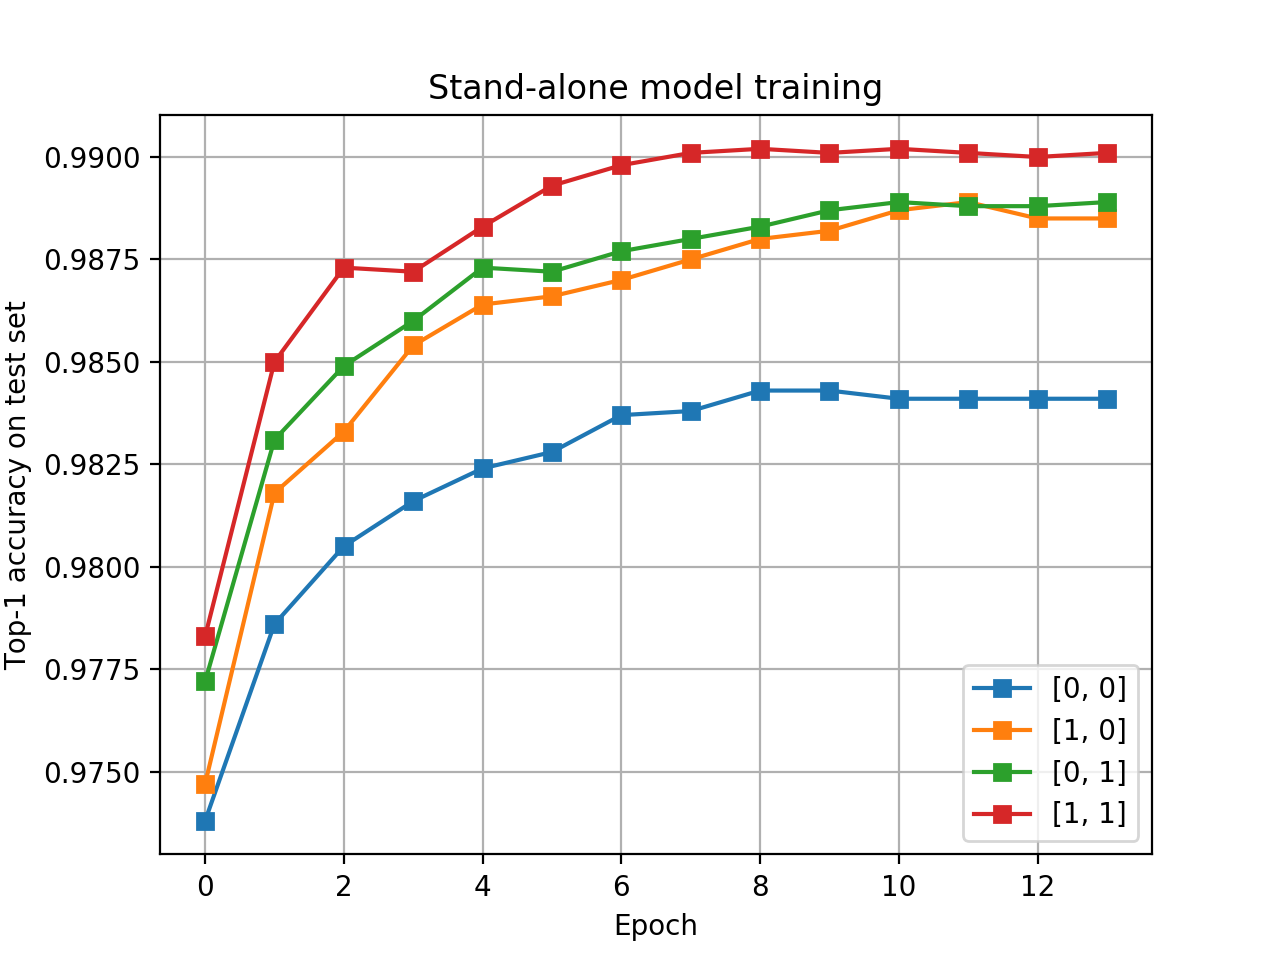

In [53]:
fig, ax = plt.subplots()
ax.plot(top1_SuperNetSum.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_standalone_SuperNetSum.png')

In [64]:
with open('top1_SuperNetSum.pickle', 'wb') as handle:
    pickle.dump([top1_oneshot_SuperNetSum, top1_SuperNetSum], handle)

### Is the one-shot trained subnet performance predictive of its stand-alone performance?

<IPython.core.display.Javascript object>


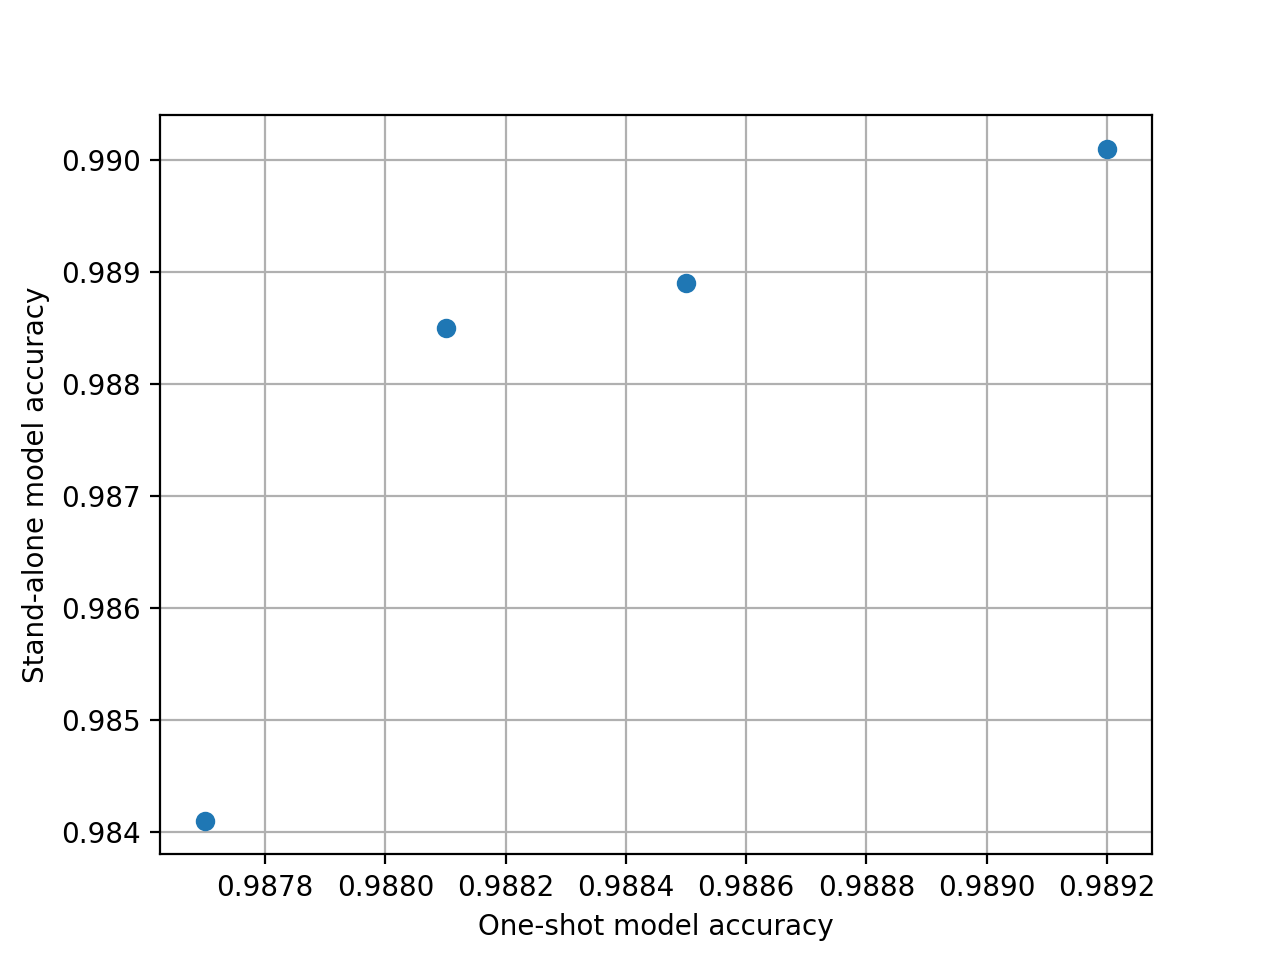

In [59]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetSum[-1,:], top1_SuperNetSum.T[-1,:], 'o')
ax.grid()
xlabel('One-shot model accuracy')
ylabel('Stand-alone model accuracy')
fig.savefig('figures/oneshot_v_standalone_SuperNetSum.png')

### SuperNetConcat. One-shot accuracy

In [57]:
top1_oneshot_SuperNetConcat = train_supernet_mnist(SuperNetConcat(conv1channels=8, conv2channels=8, hidden=32), 
                                                   training_settings)

top1_oneshot_SuperNetConcat = np.array(top1_oneshot_SuperNetConcat)


Training SuperNet

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309607
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.135206
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.006648
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.429230
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.366571
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.503644
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.472589
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.304385
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.114107
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.185360
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.276040
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.188924
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.166338
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.151612
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.226267
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.152927
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.145647
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.082402
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.241091
Test set: Average loss: 0.1566, Accurac

Test set: Average loss: 0.0453, Accuracy: 9857/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.046968
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.006941
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.122236
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.144466
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.050662
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.050161
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.036177
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.018764
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.008602
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.004612
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.061291
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.083669
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.032383
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.034995
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.123611
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.016135
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.179090
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.045151
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.079394


Test set: Average loss: 0.0442, Accuracy: 9860/10000 (99%)
Test set: Average loss: 0.0428, Accuracy: 9865/10000 (99%)
Test set: Average loss: 0.0424, Accuracy: 9869/10000 (99%)


<IPython.core.display.Javascript object>


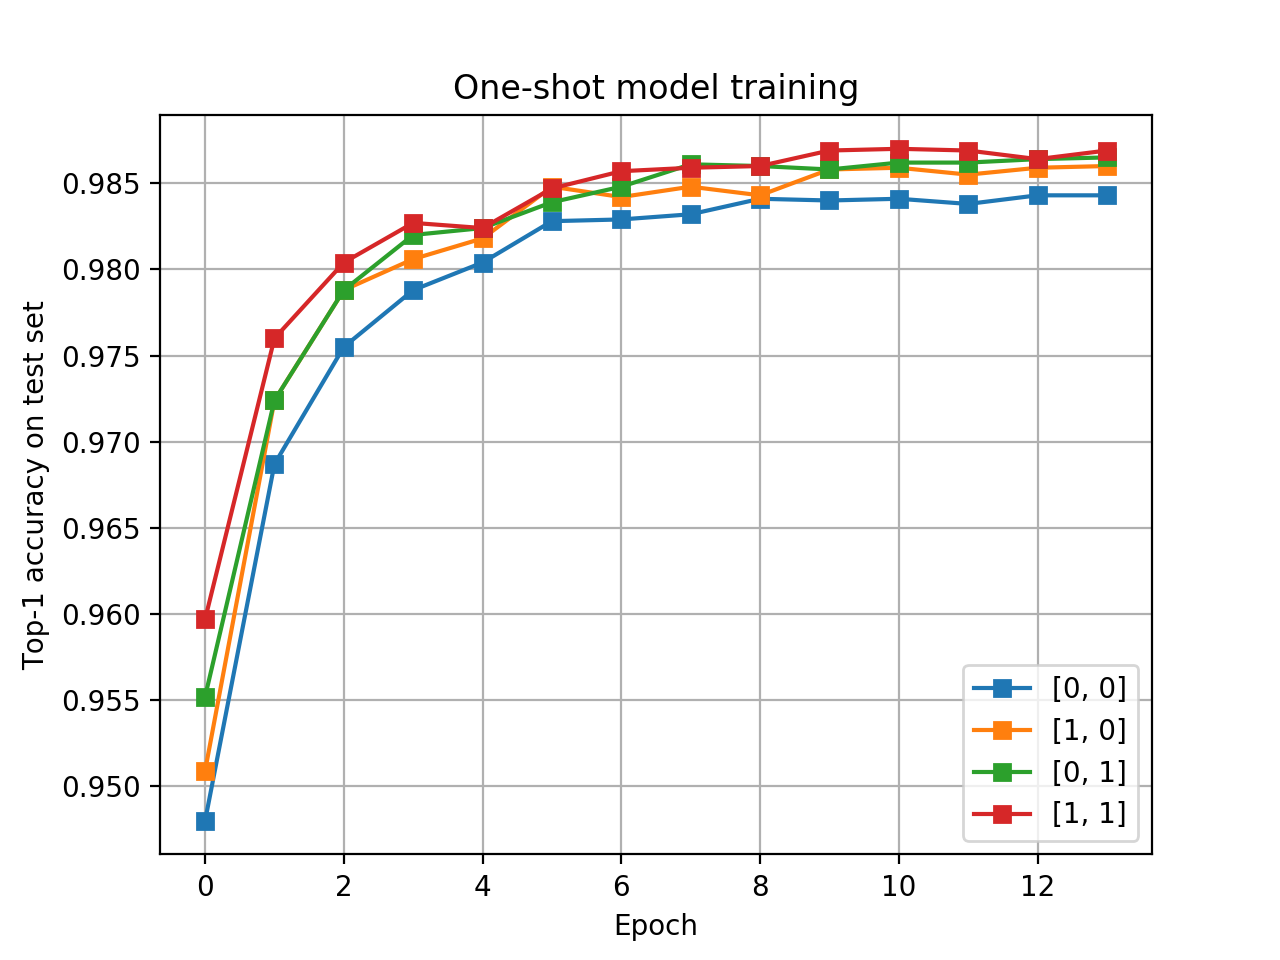

In [58]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetConcat, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('One-shot model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_oneshot_SuperNetConcat.png')

### SuperNetConcat. Stand-alone accuracy

In [60]:
top1_standalone_SuperNetConcat = []
for k, subnet in enumerate([[0, 0], [1, 0], [0, 1], [1, 1]]):
    top1_standalone_SuperNetConcat.append(train_supernet_mnist(SuperNetConcat(conv1channels=8, conv2channels=8, hidden=32), 
                                                    training_settings, subnet=subnet))

top1_standalone_SuperNetConcat = np.array(top1_standalone_SuperNetConcat)


Training subnet [0, 0]

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311699
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.906051
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.425182
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.272254
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.202571
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.411672
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.614472
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.124833
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.080552
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.136537
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.173100
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.231747
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.183015
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.132298
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.187067
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.146671
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.185481
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.025984
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.182776
Test set: Average loss: 0.1107, Ac

Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.023716
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.011813
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.012824
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.022084
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.023468
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.008887
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.011818
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.157947
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.063511
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.026094
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.008623
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.037226
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.135861
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.047804
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.030995
Test set: Average loss: 0.0426, Accuracy: 9859/10000 (99%)
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.032962
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.012974
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.072249
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.017

Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.095169
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.012549
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.008285
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.018341
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.045826
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.148760
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.126250
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.105069
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.105297
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.020083
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.235166
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.053198
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.046034
Test set: Average loss: 0.0467, Accuracy: 9855/10000 (99%)
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.018624
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.007628
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.076857
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.154887
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.034515
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.026950


Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.007883
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.145044
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.078002
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.041672
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.099329
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.004553
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.167695
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.047986
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.008860
Test set: Average loss: 0.0357, Accuracy: 9873/10000 (99%)
Train Epoch: 12 [0/60000 (0%)]	Loss: 0.004245
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.004010
Train Epoch: 12 [6400/60000 (11%)]	Loss: 0.099757
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.106520
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.010405
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.014440
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.033957
Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.003314
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.006204
Train Epoch: 12 [28800/60000 (48

Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.009976
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.030991
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.017434
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.119874
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.006791
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.023189
Test set: Average loss: 0.0404, Accuracy: 9868/10000 (99%)
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.022547
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.008581
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.020219
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.061470
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.008224
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.007375
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.003472
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.014497
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.006277
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.009849
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.024154
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.176843
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.085864


Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.122128
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.009876
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.019420
Test set: Average loss: 0.0370, Accuracy: 9884/10000 (99%)
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.009499
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.004430
Train Epoch: 14 [6400/60000 (11%)]	Loss: 0.019843
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.060352
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.004984
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.008274
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.001963
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.000890
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.010706
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.002307
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.007325
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.148643
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.061834
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.006843
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.039358
Train Epoch: 14 [48000/60000 (80

Test set: Average loss: 0.0396, Accuracy: 9874/10000 (99%)
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.002523
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001772
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.023874
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.032002
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.009596
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.004765
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.047953
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.004645
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.013299
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.020937
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.005951
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.134767
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.077023
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.033685
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.015223
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.005205
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.126869
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.018162
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.046243


<IPython.core.display.Javascript object>


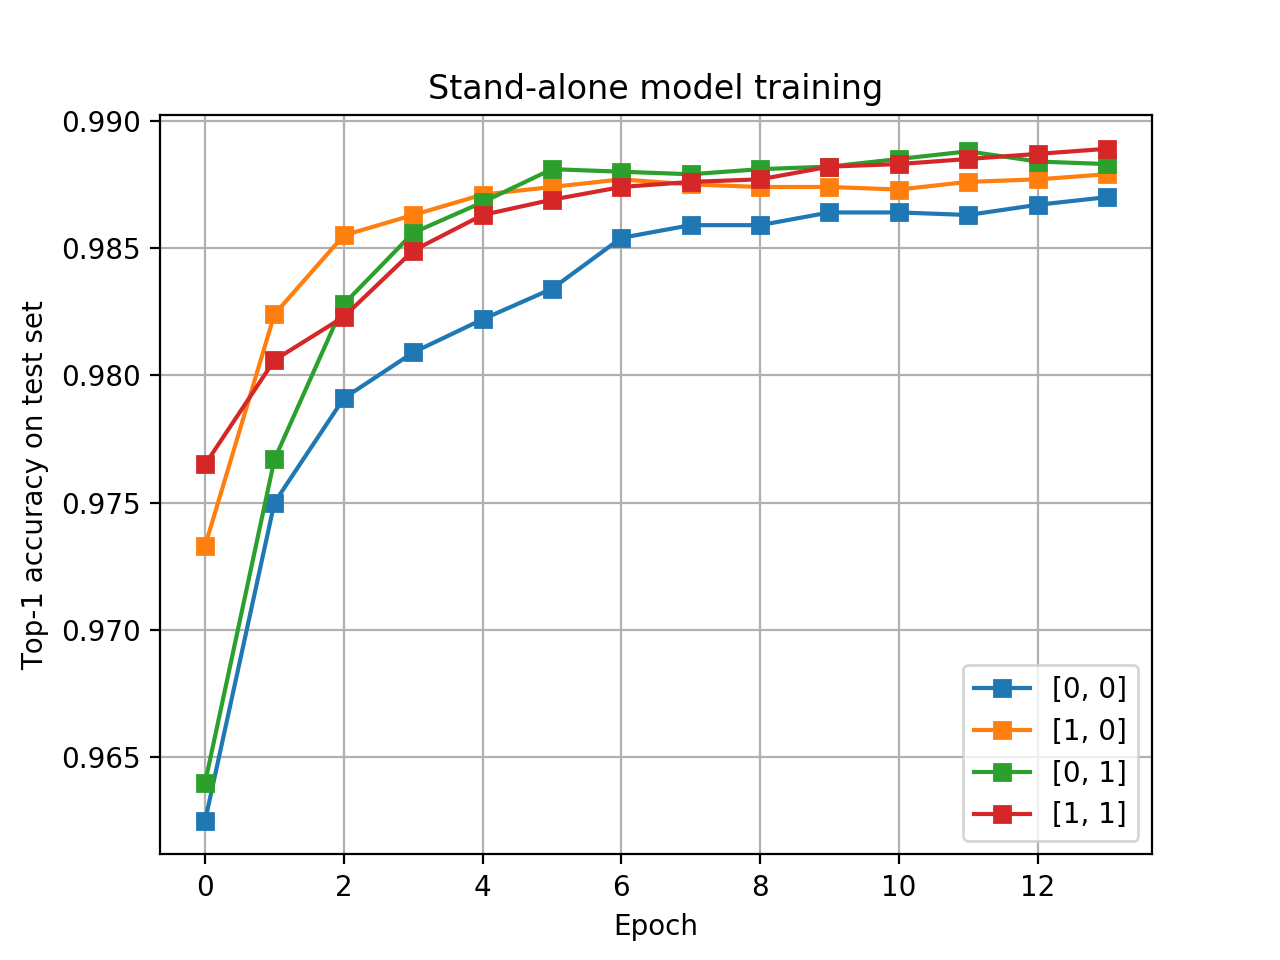

In [61]:
fig, ax = plt.subplots()
ax.plot(top1_standalone_SuperNetConcat.T, '-s')
ax.grid()
ax.legend([[0,0], [1,0], [0,1], [1,1]])
title('Stand-alone model training')
xlabel('Epoch')
ylabel('Top-1 accuracy on test set')
fig.savefig('figures/top1_standalone_SuperNetConcat.png')

<IPython.core.display.Javascript object>


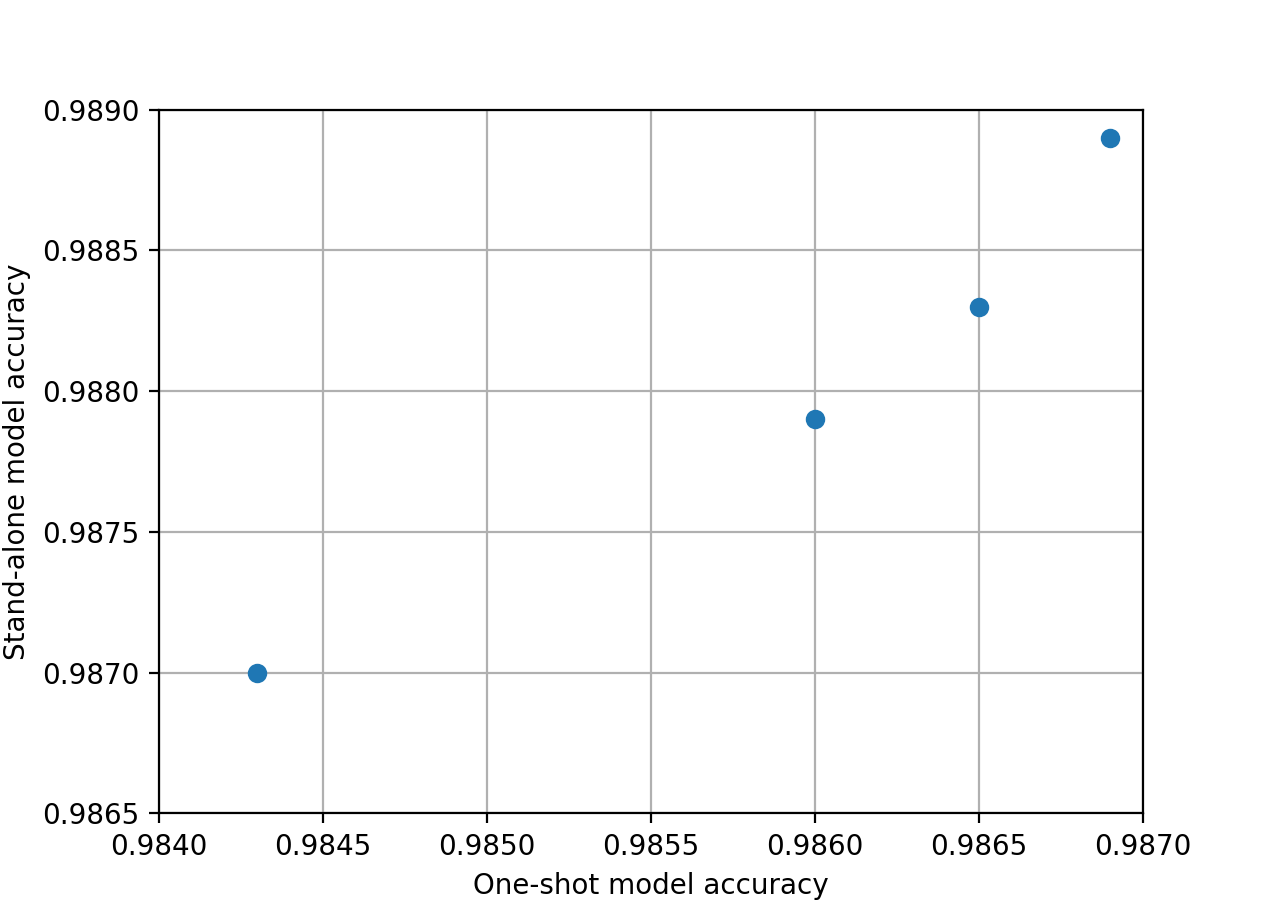

In [68]:
fig, ax = plt.subplots()
ax.plot(top1_oneshot_SuperNetConcat[-1,:], top1_standalone_SuperNetConcat.T[-1,:], 'o')
ax.grid()
xlabel('One-shot model accuracy')
ylabel('Stand-alone model accuracy')
xlim([0.984, 0.987])
ylim([0.9865, 0.989])
fig.savefig('figures/oneshot_v_standalone_SuperNetConcat.png')

In [65]:
with open('top1_SuperNetConcat.pickle', 'wb') as handle:
    pickle.dump([top1_oneshot_SuperNetConcat, top1_standalone_SuperNetConcat], handle)